In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
data = pd.read_csv('Real_State_Bogota2.csv')
data.dropna()
data = data[data['rent_price'] != 0]
data.describe()

,longitude,latitude,stratum,bathrooms,constructed_area,house_age,bedrooms,parking,administration,floor,rent_price
count,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000,8.608000e+03,8608.000000,8.608000e+03
mean,-74.081448,4.707455,4.553322,2.314707,204.488625,14.758364,2.438197,1.273234,4.398654e+05,2.773234,7.426174e+06
std,0.824688,0.338419,2.652429,1.255658,8406.533497,11.048219,0.945790,1.199384,8.347129e+05,3.682208,1.230168e+08
min,-77.289511,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+05
25%,-74.097635,4.652891,3.000000,1.000000,51.000000,4.000000,2.000000,0.000000,0.000000e+00,0.000000,1.500000e+06
50%,-74.056609,4.679242,5.000000,2.000000,78.000000,12.000000,2.000000,1.000000,0.000000e+00,2.000000,2.900000e+06
75%,-74.046346,4.705614,6.000000,3.000000,140.000000,23.000000,3.000000,2.000000,6.000000e+05,4.000000,6.000000e+06
max,0.000000,11.236149,110.000000,30.000000,780000.000000,31.000000,30.000000,11.000000,2.800000e+07,26.000000,1.050000e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 0 to 8687
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         8608 non-null   float64
 1   latitude          8608 non-null   float64
 2   stratum           8608 non-null   float64
 3   bathrooms         8608 non-null   float64
 4   constructed_area  8608 non-null   float64
 5   house_age         8608 non-null   float64
 6   bedrooms          8608 non-null   float64
 7   parking           8608 non-null   float64
 8   administration    8608 non-null   float64
 9   floor             8608 non-null   float64
 10  rent_price        8608 non-null   float64
dtypes: float64(11)
memory usage: 814.4 KB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'stratum'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'constructed_area'}>,
        <AxesSubplot:title={'center':'house_age'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'administration'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'rent_price'}>, <AxesSubplot:>]],
      dtype=object)

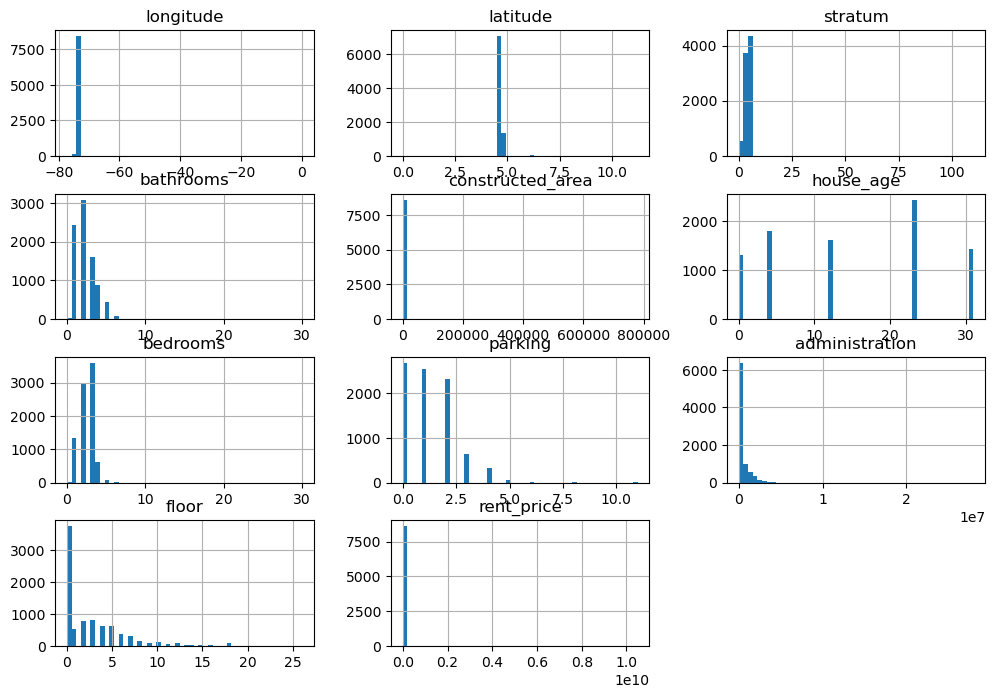

In [5]:
data.hist(bins=50, figsize=(12,8))

In [43]:
#Eliminando valores atipicos de valores de arriendo atipicos. Utilizando z_score
mean = data['rent_price'].mean()
std_dev = data['rent_price'].std()
z_score = (data['rent_price']-mean) / std_dev

data = data[z_score <= 3]

In [7]:
#longitude atypical value
z_score_latitude = stats.zscore(data['longitude'])
# data = data[(z_score_latitude >= -3) & (z_score_latitude<=3)]
data = data[(data['latitude']>=4.45)&(data['latitude']<=4.83)]

In [8]:
#latitude atypical value
#Reviewing the data there are locations that are not from Bogotá, these are from other cities in the country
z_score_longitude = stats.zscore(data['latitude'])
# data = data[(z_score_longitude >= -3) & (z_score_longitude <= 3)]
data = data[(data['longitude']>=-74.25)&(data['longitude']<=-73.8)]

In [9]:
#Calculating the mean stratum for some apartments which have some atypical values on stratum
def calculate_mean_stratum(data, rent_price):
    similar_apartments = data[(data['rent_price'] < rent_price * 1.25) & (data['rent_price'] > rent_price * 0.75)]
    return int(similar_apartments['stratum'].mean()) if not similar_apartments.empty else None

temp = data['stratum'] > 6
for id in data.loc[temp].index:
    rent_price = data.at[id, 'rent_price']
    data.at[id, 'stratum'] = calculate_mean_stratum(data, rent_price)

In [10]:
#Bathrooms atypical value
z_score_bathrooms = stats.zscore(data['bathrooms'])
data = data[z_score_bathrooms<4]

In [11]:
z_score_bedrooms = stats.zscore(data['bedrooms'])
data = data[z_score_bedrooms<4]

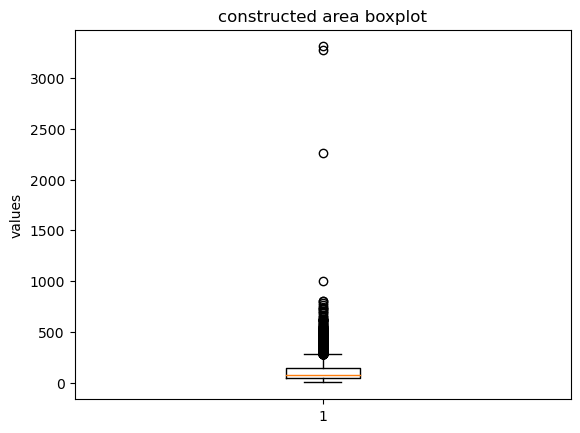

In [12]:
plt.boxplot(data['constructed_area'])
plt.title('constructed area boxplot')
plt.ylabel('values')
plt.show()

# data['constructed_area']

In [13]:
#Calculating the mean contructed area for some apartments which have some atypical values on area
def calculate_mean_feature(data, rent_price, feature_name):
    similar_apartments = data[(data['rent_price'] < rent_price * 1.25) & (data['rent_price'] > rent_price * 0.75)]
    return int(similar_apartments[feature_name].mean()) if not similar_apartments.empty else None

def replace_ouliers_with_mean_feature(data, feature_name=''):
    z_score_feature = stats.zscore(data[feature_name])
    temp = data[z_score_feature>3]
    for id in temp.index:
        rent_price = data.at[id, 'rent_price']
        data.at[id, feature_name] = calculate_mean_feature(data, rent_price, feature_name)
    return data

data = replace_ouliers_with_mean_feature(data, 'parking')
data = replace_ouliers_with_mean_feature(data, 'constructed_area')
data = replace_ouliers_with_mean_feature(data, 'administration')

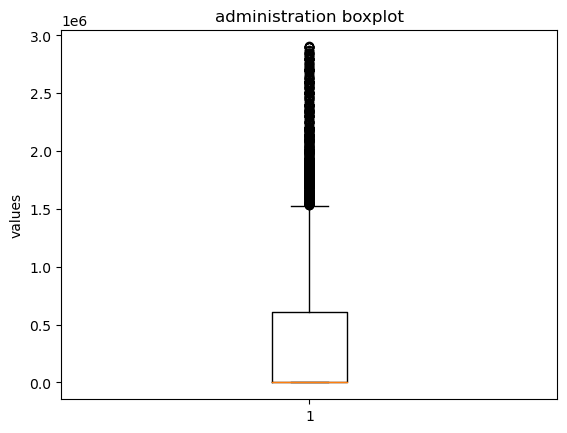

In [14]:
plt.boxplot(data['administration'])
plt.title('administration boxplot')
plt.ylabel('values')
plt.show()


In [15]:
data['Total_rent_price'] = data['rent_price'] + data['administration']

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'stratum'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'constructed_area'}>,
        <AxesSubplot:title={'center':'house_age'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'administration'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'rent_price'}>,
        <AxesSubplot:title={'center':'Total_rent_price'}>]], dtype=object)

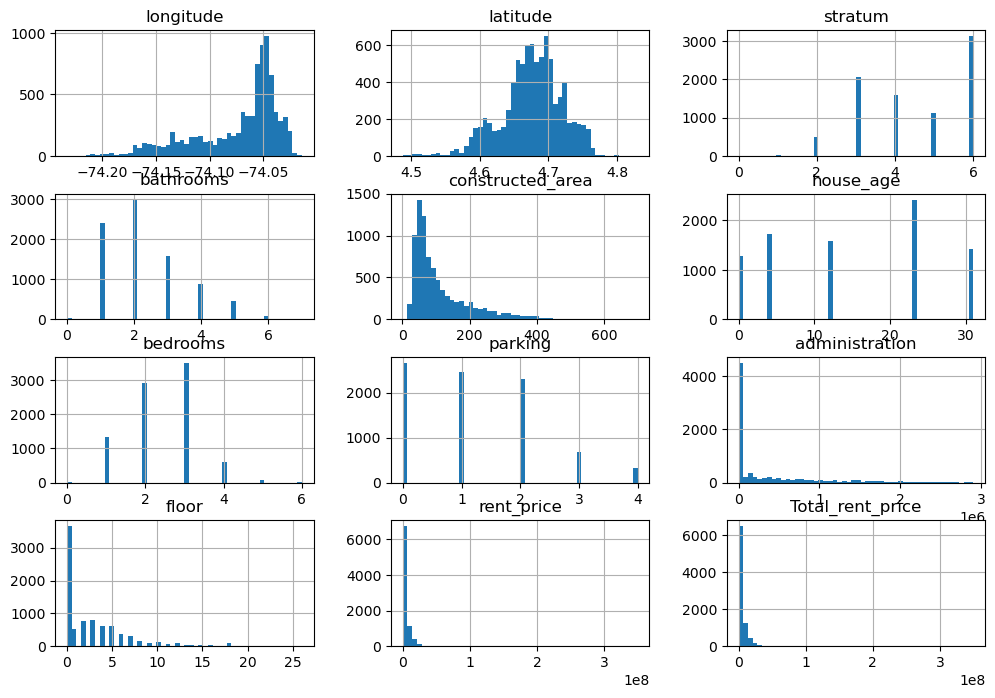

In [16]:
data.hist(bins=50, figsize=(12,8))

Identificando valores atipicos con metodos estadisticos
Rango interquartil y
con el Z_score es mayor a 3, es decir esta a tres desviaciones estandar de la media

In [17]:
#creating a test set
def shuffle_and_split_data(data, test_ratio):
    sheffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = sheffled_indices[:test_set_size]
    train_indices = sheffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#train_set, test_set = shuffle_and_split_data(data, 0.2)
#len(train_set)

In [18]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print('train = ', len(train_set), '\ntest = ', len(test_set))

train =  6742 
test =  1686


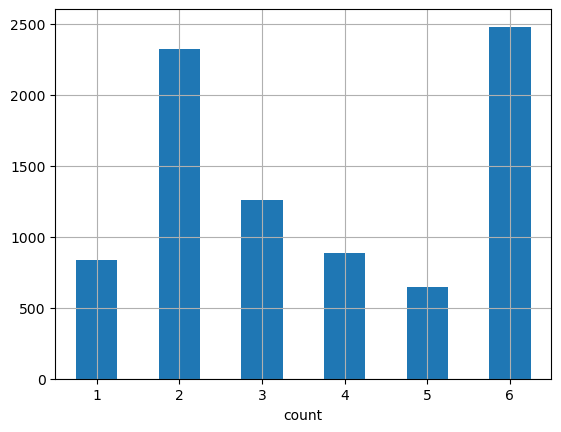

In [19]:
data['rent_cat'] = pd.cut(data['rent_price'],
                        bins=[0, 1000000, 2000000,3000000,4000000, 5000000, np.inf], 
                        labels=[1,2,3,4,5,6])
data['rent_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('rent cateogry')
plt.xlabel('count')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    data, test_size=0.2, stratify=data['rent_cat'], random_state=42)

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('rent_cat', axis=1, inplace=True)

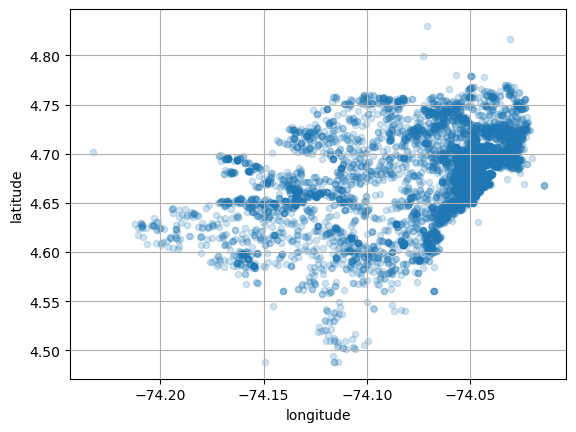

In [22]:
apartment_rent = strat_train_set.copy()
apartment_rent.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha = 0.2)
plt.show()

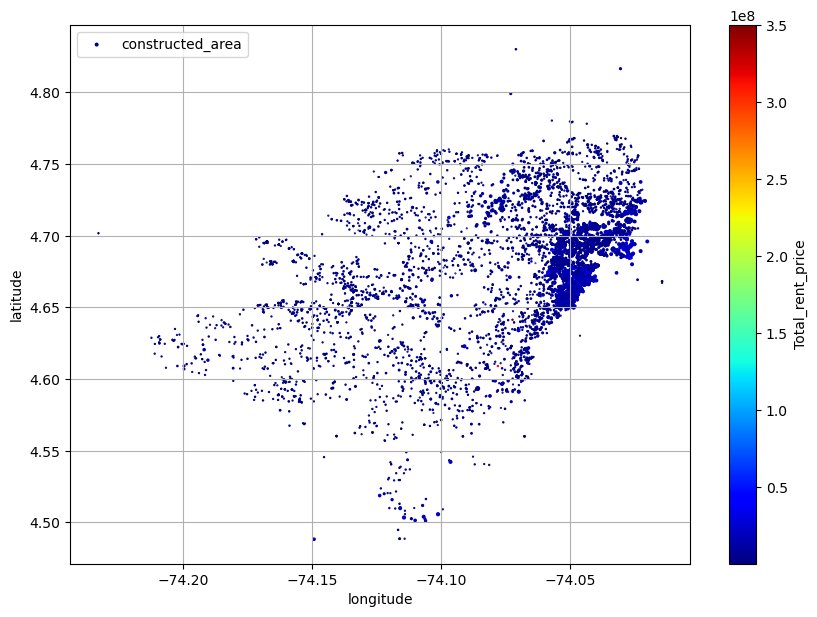

In [23]:
apartment_rent.plot(kind="scatter", x="longitude", y="latitude", grid=True,
                s=apartment_rent["constructed_area"] / 100, label="constructed_area",
                c="Total_rent_price", cmap="jet", colorbar=True,
                legend=True, sharex=False, figsize=(10, 7))
plt.show()

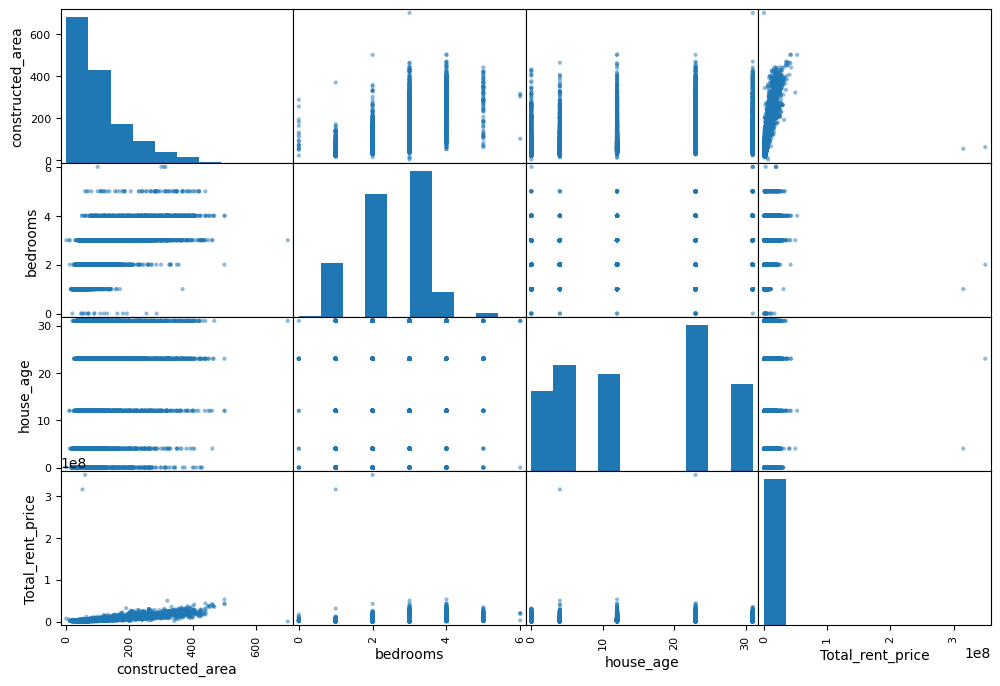

In [24]:
#Look for Correlations
from pandas.plotting import scatter_matrix
atributes = ['constructed_area', 'bedrooms', 'house_age', 'Total_rent_price']
scatter_matrix(apartment_rent[atributes], figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='Total_rent_price', ylabel='constructed_area'>

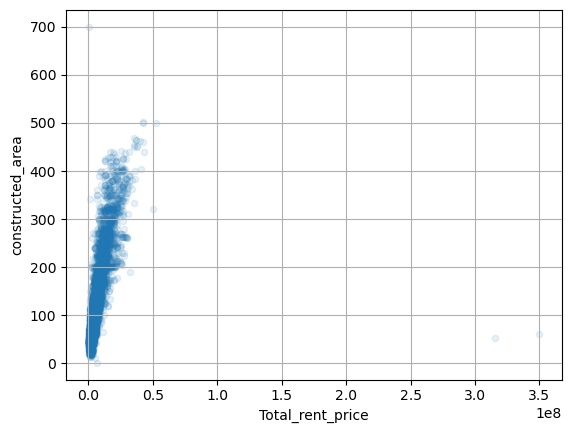

In [25]:
apartment_rent.plot(kind='scatter', x='Total_rent_price', y='constructed_area', alpha=0.1, grid=True)

In [26]:
# #Prepare the data for Machine Learning Algorithms
aparment = strat_train_set.drop(['Total_rent_price', 'rent_price'], axis=1)
apartment_labels = strat_train_set['Total_rent_price'].copy()

In [27]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(apartment_rent['constructed_area'])
# log_pop.hist(bins=80, figsize=(12,8))
# apartment_rent['constructed_area'].hist(bins=50, figsize=(12,8))

In [28]:
from sklearn.metrics.pairwise import rbf_kernel
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args = dict(Y=[[35]], gamma=0.1))
age_simil_25 = rbf_transformer.transform(apartment_rent[['constructed_area']])

In [29]:
age_simil_25

array([[4.53999298e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [1.69189792e-10],
       [6.70320046e-01],
       [8.19401262e-40]])

Creation of the Custom Piline

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean
    
    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

# CLUSTERING
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        # Eliminar el guión bajo aquí
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X, sample_weight=sample_weight)  # Uso correcto de sample_weight
        return self

    def transform(self, X):
        check_is_fitted(self, 'kmeans')
        return rbf_kernel(X, self.kmeans.cluster_centers_, gamma=self.gamma)  # Corregido cluster_centers_

    def get_feature_names_out(self, names=None):  # Nombres de características correctos
        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

# USO DEL CLUSTER SIMILARITY
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(apartment_rent[['latitude', 'longitude']], sample_weight=apartment_labels)


In [31]:
similarities[:3].round(2)

array([[0.99, 1.  , 0.98, 0.98, 0.99, 0.99, 1.  , 0.98, 0.99, 1.  ],
       [1.  , 0.99, 1.  , 0.98, 1.  , 0.99, 1.  , 0.99, 1.  , 0.99],
       [1.  , 0.98, 1.  , 0.95, 1.  , 1.  , 0.98, 1.  , 0.99, 0.99]])

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(aparment, apartment_labels)

LinearRegression()

In [33]:
apartment_predictions = lin_reg.predict(aparment)
apartment_predictions[:5].round(2)

array([  234718.84, 14259364.13,  6837155.35, 17683256.45,  4066463.49])

In [34]:
apartment_labels[:5].values

array([ 1333400., 11300000.,  3400000., 27132000.,  3700000.])

In [35]:
len(apartment_predictions)
len(apartment_labels)

6742

In [36]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(apartment_labels, apartment_predictions, squared=False)
lin_rmse

6146956.630809958

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(aparment, apartment_labels)

DecisionTreeRegressor(random_state=42)

In [38]:
apartment_predictions2 = tree_reg.predict(aparment)
tree_mse = mean_squared_error(apartment_labels, apartment_predictions2, squared=False)
tree_mse

55595.93836534644

In [39]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, aparment, apartment_labels,
                            scoring='neg_root_mean_squared_error', cv=10)

In [40]:
pd.Series(tree_rmses).describe()

count    1.000000e+01
mean     5.689225e+06
std      4.904490e+06
min      2.403444e+06
25%      2.596799e+06
50%      2.833814e+06
75%      9.911717e+06
max      1.367352e+07
dtype: float64

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_rmses = -cross_val_score(forest_reg, aparment, apartment_labels, 
                                scoring='neg_root_mean_squared_error', cv=10)

In [42]:
pd.Series(forest_rmses).describe()

count    1.000000e+01
mean     4.249825e+06
std      4.555725e+06
min      1.679053e+06
25%      2.013389e+06
50%      2.235803e+06
75%      2.285550e+06
max      1.353877e+07
dtype: float64